In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
import textdistance

In [2]:
true_pair = pd.read_csv('../train_data/true_pairs_by_cosine_070_title_main_passage_keywords.csv', delimiter=',')

In [3]:
true_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94167 entries, 0 to 94166
Data columns (total 9 columns):
article_id                  94167 non-null int64
article_keywords            94167 non-null object
article_meta_description    94167 non-null object
article_page_title          94167 non-null object
label                       94167 non-null int64
table_id                    94167 non-null int64
table_page_keywords         94166 non-null object
table_page_summary          94021 non-null object
table_page_title            94167 non-null object
dtypes: int64(3), object(6)
memory usage: 6.5+ MB


In [4]:
#first attribute for articles: article title
ATitle_TTitle_distance = []
ATitle_TSummary_distance = []
ATitle_TKeywords_distance = []

#second attribute for articles: article summary

ASummary_TTitle_distance = []
ASummary_TSummary_distance = []
ASummary_TKeywords_distance = []

#third attribute for articles: article keywords

AKeywords_TTitle_distance = []
AKeywords_TSummary_distance = []
AKeywords_TKeywords_distance = []

for i, row in tqdm(true_pair.iterrows()):
    
    article_page_title = str(row['article_page_title'])
    article_page_summary = str(row['article_meta_description'])
    article_page_keywords = str(row['article_keywords'])
    
    table_page_title = str(row['table_page_title'])
    table_page_summary = str(row['table_page_summary'])
    table_page_keywords = str(row['table_page_title'])
    
    #first attribute of artcle: article title
    
    similarity1 = textdistance.jaccard.normalized_similarity(article_page_title,table_page_title)
    ATitle_TTitle_distance.append(similarity1)
    
    similarity2 = textdistance.jaccard.normalized_similarity(article_page_title,table_page_summary)
    ATitle_TSummary_distance.append(similarity2)
    
    similarity3 = textdistance.jaccard.normalized_similarity(article_page_title,table_page_keywords)
    ATitle_TKeywords_distance.append(similarity3)
    
    #second attribute of article: article summary
    
    similarity4 = textdistance.jaccard.normalized_similarity(article_page_summary,table_page_title)
    ASummary_TTitle_distance.append(similarity4)
    
    similarity5 = textdistance.jaccard.normalized_similarity(article_page_summary,table_page_summary)
    ASummary_TSummary_distance.append(similarity5)
    
    similarity6 = textdistance.jaccard.normalized_similarity(article_page_summary,table_page_keywords)
    ASummary_TKeywords_distance.append(similarity6)
    
    #third attribute of article: article keywords
    
    similarity7 = textdistance.jaccard.normalized_similarity(article_page_keywords,table_page_title)
    AKeywords_TTitle_distance.append(similarity7)
    
    similarity8 = textdistance.jaccard.normalized_similarity(article_page_keywords,table_page_summary)
    AKeywords_TSummary_distance.append(similarity8)
    
    similarity9 = textdistance.jaccard.normalized_similarity(article_page_keywords,table_page_keywords)
    AKeywords_TKeywords_distance.append(similarity9)

2603it [00:03, 771.70it/s]


KeyboardInterrupt: 

In [30]:
#first attribute for article: article title

mean_ATitle_TTitle = np.mean(ATitle_TTitle_distance)
mean_ATitle_TSummary = np.mean(ATitle_TSummary_distance)
mean_ATitle_TKeywords = np.mean(ATitle_TKeywords_distance)

#second attribute for article: article summary

mean_ASummary_TTitle = np.mean(ASummary_TTitle_distance)
mean_ASummary_TSummary = np.mean(ASummary_TSummary_distance)
mean_ASummary_TKeywords = np.mean(ASummary_TKeywords_distance)

#third attribute for article: article summary

mean_AKeywords_TTitle = np.mean(AKeywords_TTitle_distance)
mean_AKeywords_TSummary = np.mean(AKeywords_TSummary_distance)
mean_AKeywords_TKeywords = np.mean(AKeywords_TKeywords_distance)

In [31]:
print("article title and table title = ",mean_ATitle_TTitle)
print("article title and table summary = ",mean_ATitle_TSummary)
print("article title and table keywords = ",mean_ATitle_TKeywords)

article title and table title =  0.35356259409254737
article title and table summary =  0.08718879559620656
article title and table keywords =  0.35356259409254737


In [32]:
print("article summary and table title = ",mean_ASummary_TTitle)
print("article summary and table summary = ",mean_ASummary_TSummary)
print("article summary and table keywords = ",mean_ASummary_TKeywords)

article summary and table title =  0.17247672239442843
article summary and table summary =  0.22850169376579182
article summary and table keywords =  0.17247672239442843


In [33]:
print("article keywords and table title = ",mean_AKeywords_TTitle)
print("article keywords and table summary = ",mean_AKeywords_TSummary)
print("article keywords and table keywords = ",mean_AKeywords_TKeywords)

article keywords and table title =  0.18860886794221646
article keywords and table summary =  0.18000225885463056
article keywords and table keywords =  0.18860886794221646


In [5]:
result_matrix = [[0.35356259409254737,0.08718879559620656,0.35356259409254737],
                 [0.17247672239442843,0.22850169376579182,0.17247672239442843],
                 [0.18860886794221646,0.18000225885463056,0.18860886794221646]]

In [40]:
result_matrix

[[0.35356259409254737, 0.08718879559620656, 0.35356259409254737],
 [0.17247672239442843, 0.22850169376579182, 0.17247672239442843],
 [0.18860886794221646, 0.18000225885463056, 0.18860886794221646]]

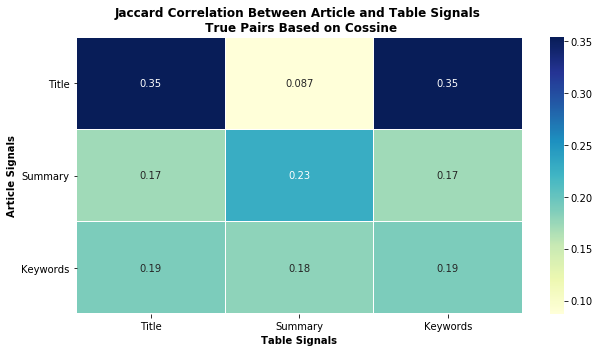

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

   
plt.figure(figsize=(9,5))

idx= ['Title','Summary','Keywords']
cols = ['Title','Summary','Keywords']
df = pd.DataFrame(result_matrix, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
heatmap = sns.heatmap(df, cmap='YlGnBu', linewidths=0.1, annot=True)
heatmap.set_yticklabels(idx,rotation=0)


plt.title('Jaccard Correlation Between Article and Table Signals \n True Pairs Based on Cosine', fontsize = 12, weight='bold')
plt.xlabel('Table Signals',weight='bold')
plt.ylabel('Article Signals',weight='bold')
plt.tight_layout()
plt.savefig('jaccard_correlation_true_pairs_based_on_cossine.pdf')
plt.show(heatmap)

